The value of epsilon is 0.443 wavenumbers.
The value of sigma is 0.821 angstroms.


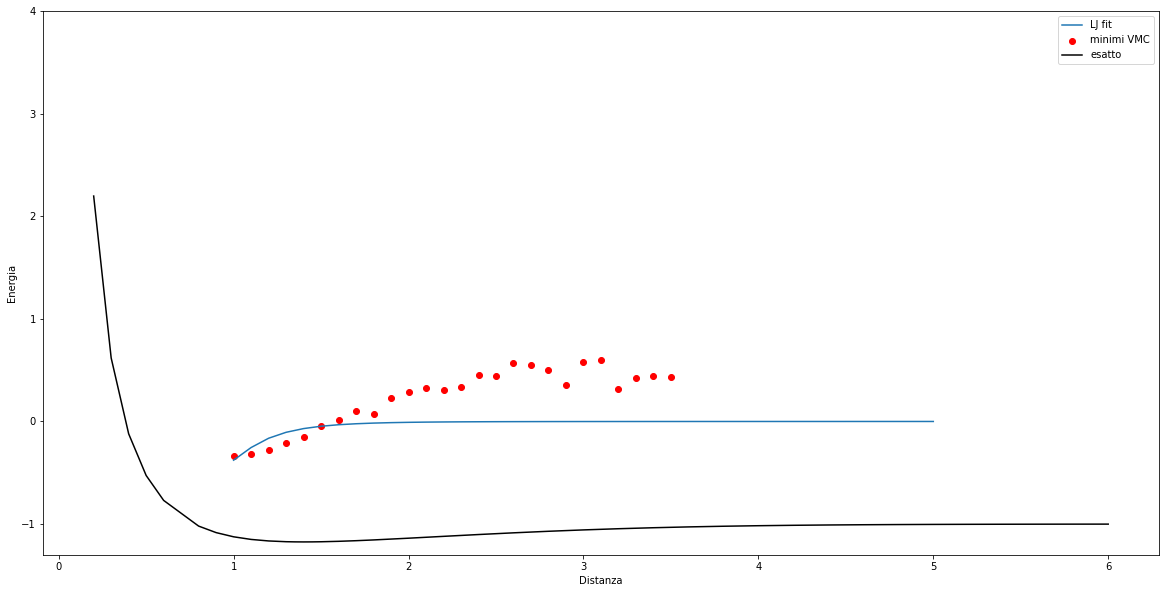

In [3]:
import numpy as np
import glob,os
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy.f2py
from numpy import loadtxt
import os
import subprocess
import re
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit

step=0.1 #incremento di R
i=0
eminbeta=[]
eminbetaR=10.0
pos=np.arange(1.0, 5.05, 0.1)
name="test"

plt.figure(figsize=(20,10))
plt.ylabel('Energia')
plt.xlabel('Distanza')

for R in pos:#np.arange(0.1, 11.5, 0.1):
        R=round(R,3)
        nome="S_"+str(R)+"00000.out" 
        emin=10
        truemin=10
        Rmin=0
        posizioni=[]
        emedie=[]
        sigma=[]
        acc=[]
        
       

        for file in sorted(os.listdir()):
                if(file.endswith(nome)):
                        fp = open(file, "r")
                        data = fp.read();
                        values = [float(i) for i in re.findall(r'-?\d+\.?\d*',data)]

                        #print(" ",R,"      ",values[0],"     ",values[4],"     ", values[3] )


                        posizioni.append(R)
                        
                        emedie.append(values[0])
                        sigma.append(values[4])
                       
                        R=round(R+step,3)

                        fp.close()
        

        for i in range(0, len(emedie)):
                if(emedie[i]<emin):
                        emin=emedie[i]
                        Rmin=posizioni[i]
        eminbeta.append(emin)
        
        
        #plt.errorbar(pos, emedie, yerr=sigma, capsize=4, barsabove=True,label=b)
        #plt.legend(loc='best')
        
          
        
#plot VMC
plt.scatter(pos, eminbeta,color='red',label='minimi VMC')


#fit lj


def LJ_func(pos, epsilon, sigma):
    V = 4*epsilon*((sigma/pos)**12-(sigma/pos)**6)
    return V

parameters, covariance = curve_fit(LJ_func, pos, eminbeta)

fit_epsilon = parameters[0]
fit_sigma = parameters[1]

print(F'The value of epsilon is {fit_epsilon:.3f} wavenumbers.')
print(F'The value of sigma is {fit_sigma:.3f} angstroms.')

fit_energies = LJ_func(pos, fit_epsilon, fit_sigma)

#plt.plot(distances, energies, 'o', label='data')
plt.plot(pos, fit_energies, '-', label='LJ fit')






for i in range(0, len(eminbeta)):
        if(eminbeta[i]<eminbetaR):
                eminbetaR=eminbeta[i]
                Rmin=pos[i]
#plt.scatter(Rmin, eminbetaR, s=40,color="purple",label='minimo VMC')

#plt.axvline(x=Rmin,color='b')
#plt.axhline(y=eminbetaR,color='orange')
#plt.axhline(y=eminbeta[-1],color='orange',label='energia di legame VMC')
#plt.text(4.5,eminbeta[-1],round(eminbeta[-1]-eminbetaR,3))

#fit VMC
#fit = np.polyfit(pos, eminbeta, 2)
#k = fit[0]
#fit_equation = k*np.square(pos-Rmin) +eminbetaR
#plt.plot(pos, fit_equation,color = 'r',alpha = 0.5, label =  round(k/2,3))

#per ogni beta
for b in np.arange(1.00, 1.905, 0.01):
        b=round(b,2)
        #print('b',b)
        nome="p_"+str(b)+'00' 
        R=0.1                 #R iniziale
        emin=10.0
        truemin=10.0
        Rmin=0
        posizioni=[]
        emedie=[]
        sigma=[]
        for file in sorted(os.listdir()):
                if(file.startswith(nome)):
                        fp = open(file, "r")
                        data = fp.read();
                        values = [float(i) for i in re.findall(r'-?\d+\.?\d*',data)]

                        posizioni.append(R)

                        emedie.append(values[0])
                        sigma.append(values[4])
                        acc.append(values[3])
                        R=round(R+step,3)
                             
                        #print(emedie)
                        fp.close()
                        #quando cambia beta
                        if(any(np.isin(eminbeta,emedie))):
                                if(name!=nome):
                                        plt.axvline(x=R,linestyle='--',color='yellow')
                                        plt.text(R,2*b , b)
                                        name=nome
        #print(b,round(np.average(sigma),3),round(np.average(acc),3))                                
        #print(len(emedie), len(pos),len(sigma))
        #plt.errorbar(pos, emedie, yerr=sigma, capsize=4, barsabove=True)
        
        
        
      
        
#plot esatto
veri=open("h2.txt")
val=np.loadtxt(veri)
pos=val[:, 0]
true=val[:, 1]
for i in range(0, len(true)):
                if(true[i]<truemin):
                    truemin=true[i]
                    Rvmin=pos[i]
#plt.xlim(left=0.3, right= 2.5)
plt.ylim(top=4.0,bottom=-1.3)
plt.errorbar(pos, true,color='black', label="esatto")
#plt.scatter(Rvmin, truemin, s=40,color="green",label='minimo esatto')

#plt.axvline(x=Rvmin,color='green',label='distanza di legame')
#plt.axhline(y=truemin,color='b')
#plt.axhline(y=true[-1],color='b',label='energia di legame esatta')
#plt.text(5.5,true[-1],round(true[-1]-truemin,3))
#plt.text(Rvmin,-0.7,Rvmin)
#fit esatto
fit = np.polyfit(pos, true, 2)
a = fit[0]
fit_equation = a * np.square(pos-Rvmin) +truemin
#plt.plot(pos, fit_equation,color = 'grey',alpha = 0.5, label =  round(a/2,3))                                



    
plt.legend(loc='best')
plt.show()


